In [1]:
import gensim.downloader as api
import glob
import sys
import os
import pandas as pd

from tqdm import tqdm

sys.path.append("../../../../utils")
from absolute_path_builder import AbsolutePathBuilder

In [2]:
DATASET = "youtube"

input_path = AbsolutePathBuilder.get_path(
    f"04_{DATASET}_scored",
    filepaths="../../../../config/filepaths.yaml"
)

dfs = []

filenames = [file.split("/")[-1] for file in glob.glob(os.path.join(input_path, "*"))]
for file in tqdm(filenames):
    dfs.append(pd.read_csv(os.path.join(input_path, file)))
    
df = pd.concat(dfs)
del dfs

100%|██████████████████████████████████████████████████████████████| 634/634 [00:00<00:00, 973.63it/s]


In [3]:
df = df.iloc[:1500]

---

In [6]:
# embedding_model = api.load("glove-wiki-gigaword-50")
embedding_model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [7]:
idx_vs_score = []

for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i == j:
            continue

        dist = embedding_model.wmdistance(row1.text, row2.text)

        idx_vs_score.append((row1.perspective_score, row2.perspective_score, dist))

In [8]:
idx_vs_score = sorted(idx_vs_score, key=lambda x: x[2])

idx_vs_score = [item for item in idx_vs_score if item[2] > 0]
idx_vs_score = [item for item in idx_vs_score if item[2] < 0.35]

In [9]:
d = pd.DataFrame(idx_vs_score, columns=["p1", "p2", "d"])

In [10]:
d.d = d.d.round(4)
d = d.drop_duplicates(subset="d")

/home/guilherme/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/guilherme/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


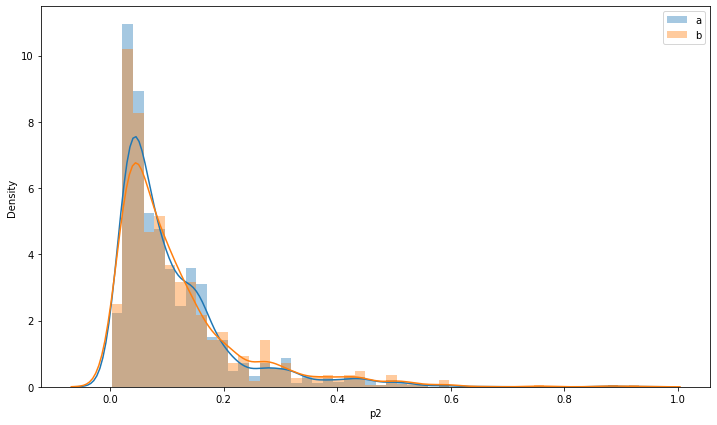

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(12,7))

sns.distplot(d.p1, label="a")
sns.distplot(d.p2, label="b")

plt.legend()
plt.show()

In [12]:
d

,p1,p2,d
0,0.141043,0.130177,0.0698
2,0.138351,0.042688,0.0700
4,0.058929,0.094948,0.0746
6,0.027581,0.137005,0.0763
8,0.106349,0.271282,0.0768
...,...,...,...
943918,0.054135,0.039598,0.3496
944608,0.121805,0.379542,0.3497
945270,0.085551,0.016660,0.3498
946056,0.108281,0.112145,0.3499
